<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Workshop_mapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

### Mapa CCAA

1. Subimos y leemos la capa geográfica


In [ ]:
# Capa: https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/mapas/ccaa.zip
# Descargar la carpeta comprimida y luego subir los archivos que contiene a Colab
map_df = gpd.read_file("poligonos_ccaa_etrs89.shp")
# map_df.to_excel(r"F:\ECO\TEACHING\UPO\2019-2020\CyP\My Slides\T6\other\data.xls", columns=["NOMBRE", "code"]) # hay que seleccionar columnas porque da problemas las columnas con geodata


In [ ]:
# Podemos explorar la estructura de la tabla
map_df.head()

In [ ]:
# Se puede crear un mapa simplemente con la función .plot()
map_df.plot()

2. Subimos y leemos los datos a representar

In [ ]:
# Datos de paro: https://github.com/otoperalias/Coyuntura/blob/main/clases/datos/mapas/Ej-Geopandas_paro.xlsx
df=pd.read_excel("Ej-Geopandas_paro.xlsx","ccaa_paro")
df

3. Hacemos un "merge"

In [8]:
merged=map_df.merge(df,on="code")

4. Creamos un mapa con la tasa de paro a nivel autonómico

Text(0.3, 0.05, 'Fuente: INE. Elaboración propia.')

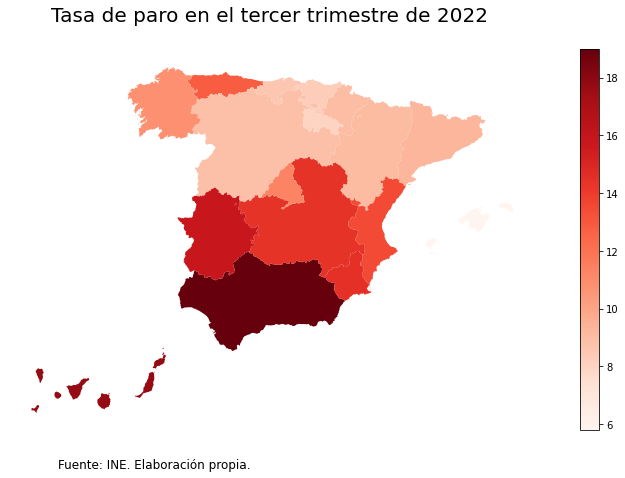

In [15]:
variable="tasaparo"
fig, ax=plt.subplots(1,figsize=(15,7))
merged.plot(column=variable, cmap='Reds',ax=ax, legend=True)
ax.axis("off")
ax.set_title("Tasa de paro en el tercer trimestre de 2022 \n",size="20")
fig.text(0.3,0.05,"Fuente: INE. Elaboración propia.",size="12")